In [166]:
import pandas as pd
import requests
import json
from config import api_key
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import csv
import datetime
import numpy as np
#use variable for airport - may later make a "live demo" intro Method to pull different .json and call other code?
departureIataCode = "DFW"
arrivalIataCode = ""


In [167]:
Departure_url = f"http://aviation-edge.com/v2/public/timetable?key={api_key}&iataCode=DFW&type=departure"

#Arrival_url = f"http://aviation-edge.com/v2/public/timetable?key={api_key}&&iataCode=DFW&type=arrival"

In [168]:
# Performing a GET request similar to the one we executed
# earlier
data = requests.get(Departure_url).json()
#responseA = requests.get(Arrival_url)
pprint(data[0])

{'airline': {'iataCode': 'QF', 'icaoCode': 'QFA', 'name': 'Qantas'},
 'arrival': {'actualRunway': None,
             'actualTime': None,
             'baggage': 'T4C1',
             'delay': None,
             'estimatedRunway': None,
             'estimatedTime': '2020-08-14T10:50:00.000',
             'gate': '40',
             'iataCode': 'LAX',
             'icaoCode': 'KLAX',
             'scheduledTime': '2020-08-14T11:12:00.000',
             'terminal': '4'},
 'codeshared': {'airline': {'iataCode': 'aa',
                            'icaoCode': 'aal',
                            'name': 'american airlines'},
                'flight': {'iataNumber': 'aa2564',
                           'icaoNumber': 'aal2564',
                           'number': '2564'}},
 'departure': {'actualRunway': '2020-08-14T10:10:00.000',
               'actualTime': '2020-08-14T10:10:00.000',
               'baggage': None,
               'delay': '10',
               'estimatedRunway': '2020-08-14T10:10

In [169]:
#JB-added terminal to the list which will give us another lookup option
names= []
datetimes= []
times= []
flights=[]
terminal= []
gate = []
status = []
#added news list to hold airportIataCodes
departureIataCodes = []
arrivalIataCodes = []
length = int(len(data)-1)

for x in range(0,length):
    names.append(data[x]["airline"]["name"])
    Time = data[x]["departure"]["scheduledTime"]
    TimeSplit = Time.split("T")[1]
    times.append(TimeSplit[:5])
    flights.append(data[x]["flight"]["iataNumber"])
    terminal.append(data[x]["departure"]["terminal"])
    gate.append(data[x]["departure"]["gate"])
    status.append(data[x]["status"])
    #added news list to hold airportIataCodes
    departureIataCodes.append(data[x]["departure"]["iataCode"])
    arrivalIataCodes.append(data[x]["arrival"]["iataCode"])
df = pd.DataFrame()
df["name"] =names
df["scheduled_Time"] =pd.to_datetime(times)
df["time"] = times
df["iata_Number"]=flights
df["terminal"]=terminal
df["gate"] = gate
df["status"] = status
#added news df columns to hold airportIataCodes
df["departure_Iata_Code"] = departureIataCodes
df["arrival_Iata_Code"] = arrivalIataCodes

#Creating new clean dataframe without cancelled and unknown status flights
#also filtering out large known shipping carriers 
Clean_df = df.loc[(df["status"] != "cancelled") & 
    (df["status"] != "unknown") &
    (df["name"] != "FedEx") &
    (df["name"] != "UPS Airlines") &
    (df["name"] != "Martinaire") &
    (df["name"] != "Ameriflight") &
    (df["name"] != "Aviastar-TU") &
    (df["name"] != "Lufthansa Cargo"),:]
#this dataframe contains all of the passenger flights pulled from the API
Clean_df

,name,scheduled_Time,time,iata_Number,terminal,gate,status,departure_Iata_Code,arrival_Iata_Code
0,Qantas,2020-08-14 10:00:00,10:00,QF3070,C,C26,active,DFW,LAX
1,Air Tahiti Nui,2020-08-14 10:00:00,10:00,TN1185,C,C26,active,DFW,LAX
2,American Airlines,2020-08-14 10:00:00,10:00,AA2564,C,C26,active,DFW,LAX
3,Sun Country Airlines,2020-08-14 10:00:00,10:00,SY676,D,D16,active,DFW,MSP
4,American Airlines,2020-08-14 10:00:00,10:00,AA2640,B,B9,active,DFW,JAC
...,...,...,...,...,...,...,...,...,...
1059,American Airlines,2020-08-14 21:05:00,21:05,AA5841,B,B35,scheduled,DFW,MOB
1060,American Airlines,2020-08-14 21:06:00,21:06,AA2694,D,D17,scheduled,DFW,IAH
1061,American Airlines,2020-08-14 21:09:00,21:09,AA5845,B,B27,scheduled,DFW,ELP
1062,American Airlines,2020-08-14 21:10:00,21:10,AA3461,E,E25,scheduled,DFW,JLN


In [170]:
# Playing around with time
# '2020-08-13 06:00:00'
# Original code
# time_df = df["scheduled_Time"] =pd.to_datetime(times, format="%b %d %Y %I:%M %p")
# Match the code to time
# time_df = df["scheduled_Time"] =pd.to_datetime(times, format="%b %d %Y %I:%M %p")
# from datetime import datetime
# d = datetime.striptime("")

# import time
# t = time.strptime(time_df, "%H:%M")
# timevalue_12hour = time.strftime("%I:%M %p", t)

# t = time.strptime(time_df, "%H:%M")
# timevalue_12hour = time.strftime("%I:%M %p", t)

# date_time = time.strftime("%b %d %Y %-I:%M %p")
# date_time
time_df = Clean_df["scheduled_Time"]
time_fixed = time_df.map(lambda x: x.strftime("%b %d %Y %I:%M %p"))
time_fixed

0       Aug 14 2020 10:00 AM
1       Aug 14 2020 10:00 AM
2       Aug 14 2020 10:00 AM
3       Aug 14 2020 10:00 AM
4       Aug 14 2020 10:00 AM
                ...         
1059    Aug 14 2020 09:05 PM
1060    Aug 14 2020 09:06 PM
1061    Aug 14 2020 09:09 PM
1062    Aug 14 2020 09:10 PM
1064    Aug 14 2020 09:46 PM
Name: scheduled_Time, Length: 1034, dtype: object

In [171]:
dateTime_df = pd.to_datetime(Clean_df["scheduled_Time"])

dateTime_df

0      2020-08-14 10:00:00
1      2020-08-14 10:00:00
2      2020-08-14 10:00:00
3      2020-08-14 10:00:00
4      2020-08-14 10:00:00
               ...        
1059   2020-08-14 21:05:00
1060   2020-08-14 21:06:00
1061   2020-08-14 21:09:00
1062   2020-08-14 21:10:00
1064   2020-08-14 21:46:00
Name: scheduled_Time, Length: 1034, dtype: datetime64[ns]

In [172]:
test1 = Clean_df.groupby(["scheduled_Time"])["iata_Number"].count()
# Convert to DataFrame
test1_df = test.to_frame()
test1_df

,iata_Number
scheduled_Time,
2020-08-14 04:15:00,1
2020-08-14 04:30:00,1
2020-08-14 05:30:00,2
2020-08-14 05:35:00,1
2020-08-14 05:50:00,2
...,...
2020-08-14 17:35:00,2
2020-08-14 17:40:00,1
2020-08-14 17:45:00,4


Text(0.5, 1.0, 'Flight Volume for Today at DFW')

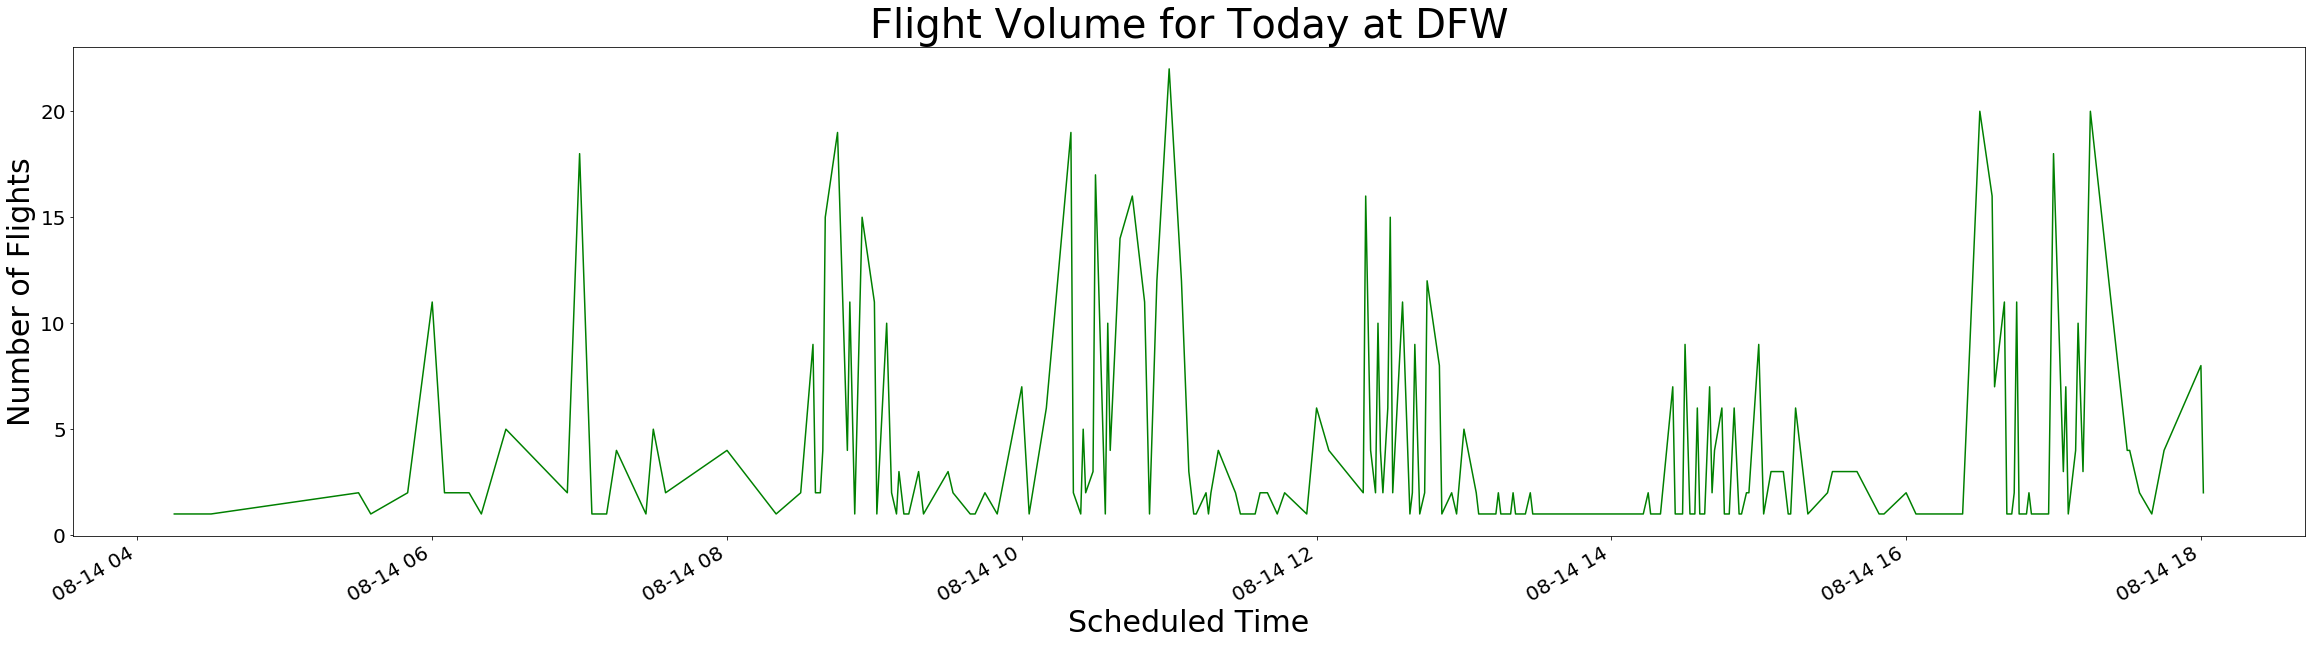

In [173]:

Chart_df = Clean_df.groupby(["scheduled_Time"])["iata_Number"].count()
test2.plot(kind="line", color="green", title="Flight per Hour", fontsize=20, figsize = (40,10))
plt.xlabel("Scheduled Time", fontsize=30)
plt.ylabel("Number of Flights", fontsize=30)
plt.title(f"Flight Volume for Today at {airportIataCode}", fontsize=40)


(737651.4166666666, 737651.9069444444)

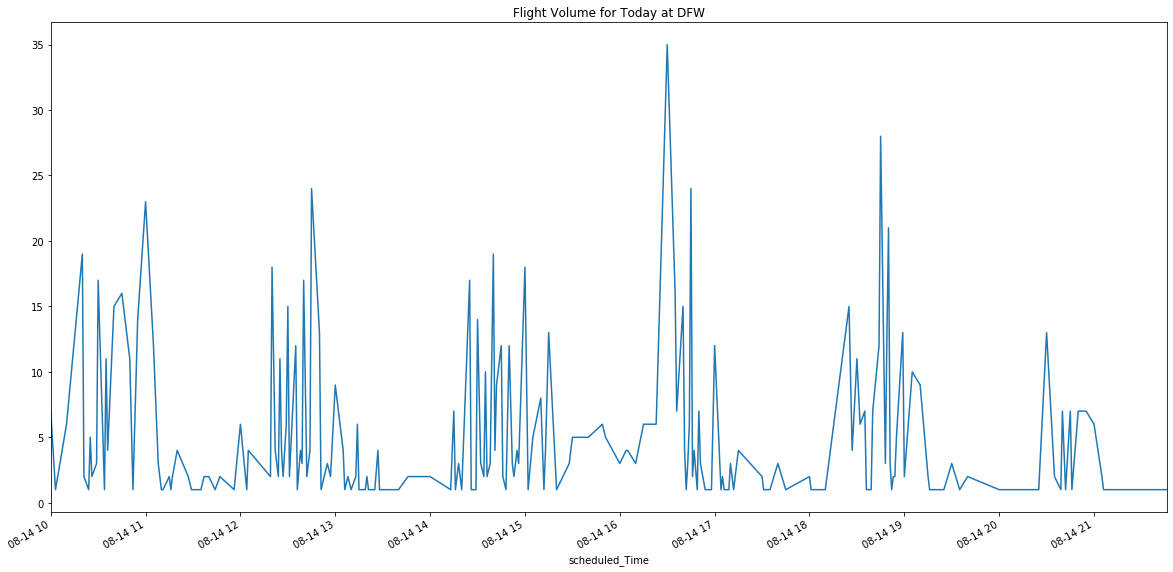

In [174]:
# Graph change with time
# This graph looks different from the original

Chart1_gb = df.groupby(["scheduled_Time"])["iata_Number"].count()
Chart1_gb.plot(kind="line", title=f"Flight Volume for Today at {airportIataCode}", figsize = (20,10))
plt.xlim(Clean_df["time"].min(),Clean_df["time"].max())


In [175]:

#establish random sample of 1 to get data for testing
randomIataNumberSample_df = Clean_df.sample(1)
#pulls fields from sample to be used for easy comparison in following kernels
randomIataNumber = randomIataNumberSample.iloc[0]
terminalNumber = randomIataNumberSample_df.iloc[0,4]
gateNumber = randomIataNumberSample_df.iloc[0,5]
randomIataCode = randomIataNumberSample.iloc[0,8]
# randomIataCode = randomIataNumberSample.loc["arrival_Iata_Code"]
# randomIataCode
#randomIataNumber = randomIataNumberSample.loc["arrival_Iata_Code"]
Arrival_url = f"http://aviation-edge.com/v2/public/timetable?key={api_key}&&iataCode={randomIataCode}&type=arrival"
print(Arrival_url)
randomIataNumberSample_df


http://aviation-edge.com/v2/public/timetable?key=72f61d-5769d8&&iataCode=BNA&type=arrival


,name,scheduled_Time,time,iata_Number,terminal,gate,status,departure_Iata_Code,arrival_Iata_Code
527,Alaska Airlines,2020-08-14 14:50:00,14:50,AS4562,E,E25,active,DFW,SJT


In [176]:
#start to get ARRIVAL .json SET UP - SATURDAY IN-GROUP TASK?

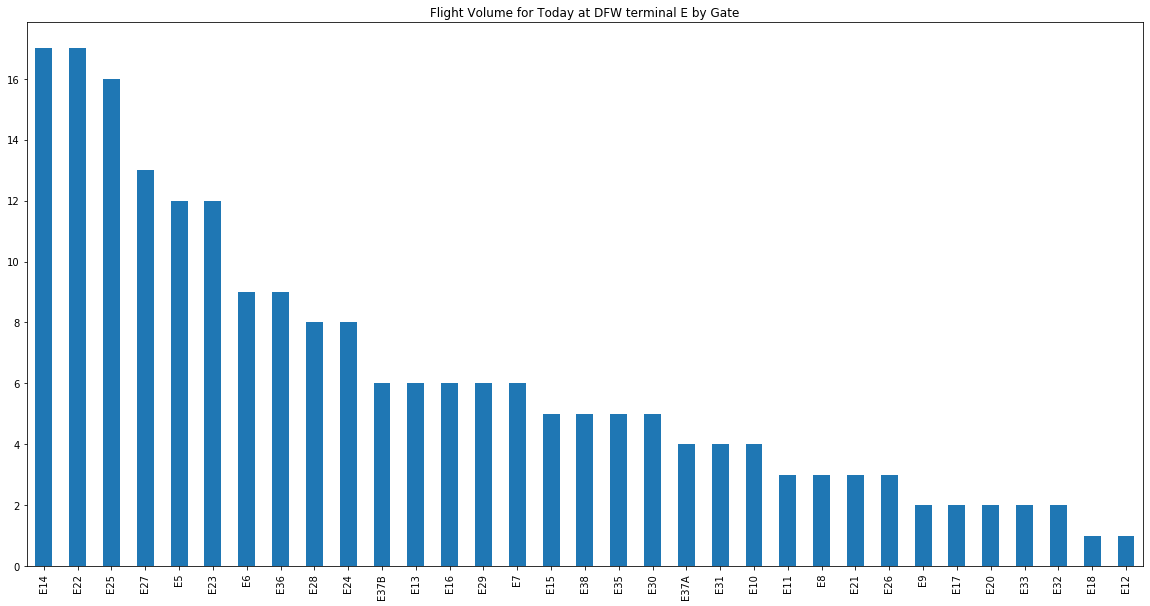

In [177]:
#code to pull and chart only information from the terminal from the random sample dataframe
gateDensity_df = Clean_df.loc[Clean_df["terminal"] == terminalNumber]
gateDensityChart_df = gateDensity_df.gate.value_counts()
gateDensityChart_df.plot(kind="bar",title=f"Flight Volume for Today at {airportIataCode} terminal {terminalNumber} by Gate", figsize = (20,10))

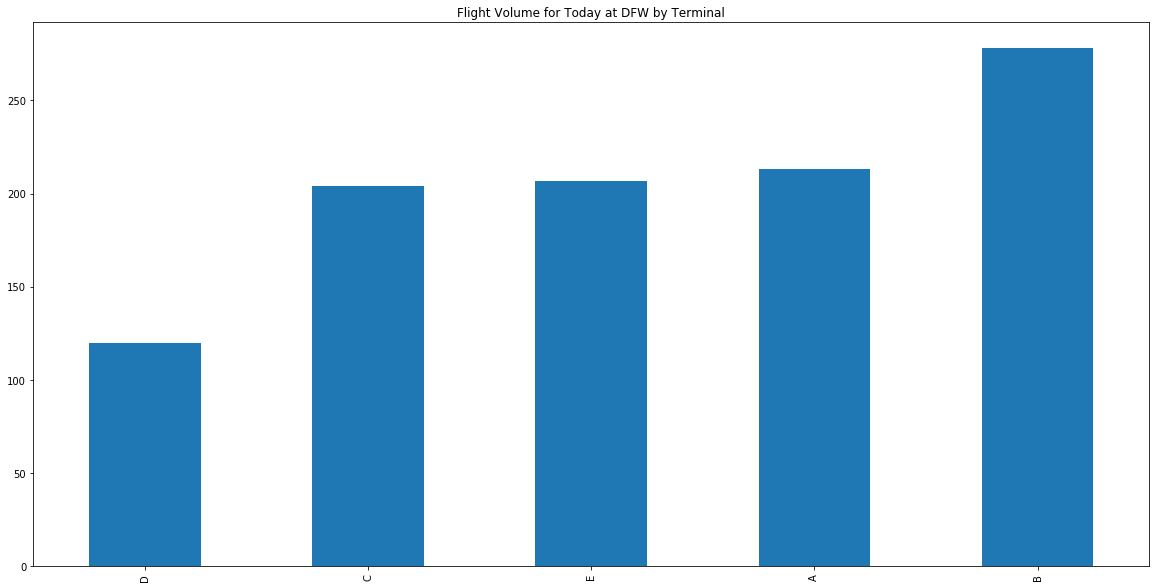

In [178]:
#code to pull and chart TERMINAL DENSITY
terminalDensityChart_df = Clean_df.terminal.value_counts().sort_values()
terminalDensityChart_df.plot(kind="bar",title=f"Flight Volume for Today at {airportIataCode} by Terminal", figsize = (20,10))

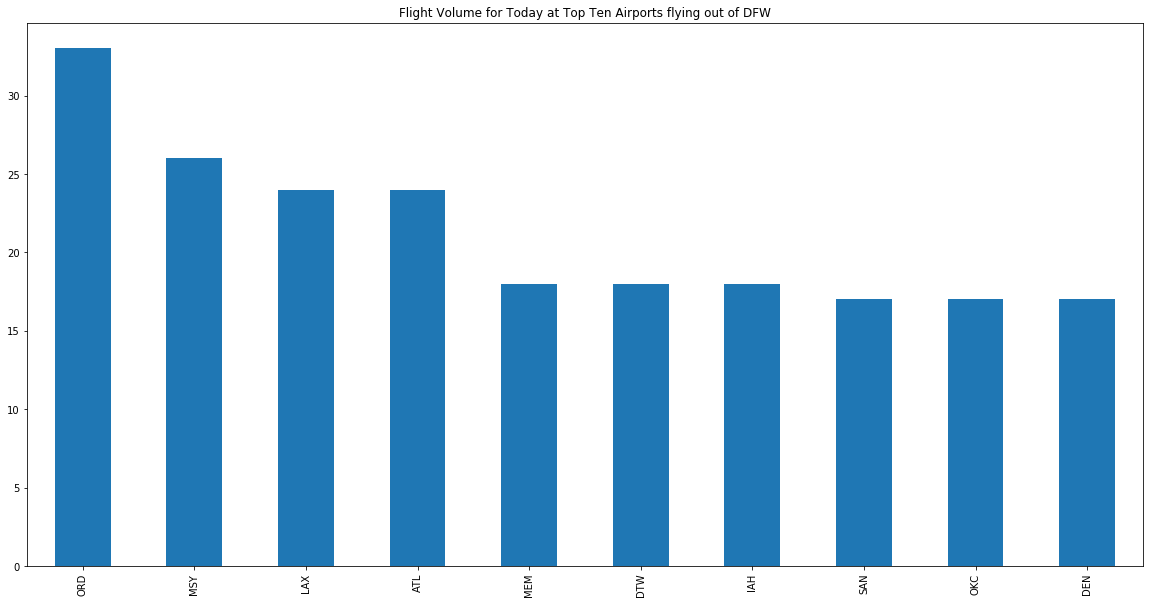

In [179]:
#code to pull and chart MOST POPULAR DESTINATIONS FROM DFW TODAY - use for top 10
topTenChart_df = Clean_df.arrival_Iata_Code.value_counts().sort_values(ascending=False).head(10)
topTenChart_df.plot(kind="bar",title=f"Flight Volume for Today at Top Ten Airports flying out of {airportIataCode}", figsize = (20,10))

In [180]:
###***EXTRA CODE FRAGMENTS***

#df.to_csv("airport_data.csv", encoding="utf-8", index=False, header=True)
#xticks=["midnight","3am","6am","9am","noon","3pm","6pm","9pm","midnight"]
#plt.xlim("2020-08-13 12:00:00","2020-08-13 23:20:00")


#x_axis = np.arange(test_df)
#tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations, test_df["scheduled_Time"])


# np.arange(np.datetime64("2020-08-13 06:00:00"), np.datetime64("2020-08-13 18:00:00"))